In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
#손실함수 오차제곱합과 교차엔트로피 오차

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

def cross_entropy_error(y, t):
    delta = 1e-7 #log의 진수가 0이 되지 않도록 더하는 값
    return -np.sum(t * np.log(y+delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #2가 정답

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #2일 확률이 가장 높다 추정
print(sum_squares_error(np.array(y), np.array(t))) #error 값이 작음
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #7일 확률이 가장 높다 추정
print(sum_squares_error(np.array(y), np.array(t))) #error 값이 큼

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #2일 확률이 가장 높다 추정
print(cross_entropy_error(np.array(y), np.array(t))) #error 값이 작음
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #7일 확률이 가장 높다 추정
print(cross_entropy_error(np.array(y), np.array(t))) #error 값이 큼

0.09750000000000003
0.5975
0.510825457099338
2.302584092994546


In [3]:
#배치용 교차엔트로피 오차

def cross_entropy_error(y, t):
    if y.ndim == 1:           # 데이터 하나당 교차 엔트로피 오차를 구하는 경우, 형상 변환
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]   # 배치 크기
    return -np.sum(t * np.log(y + 1e-7)) / batch_size


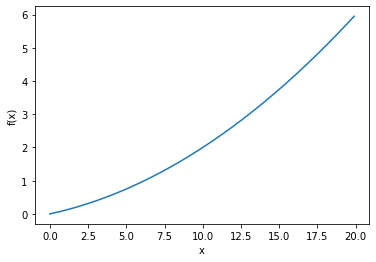

0.1999999999990898
0.2999999999986347
6.00000000000378
7.999999999999119


In [4]:
#수치미분과 편미분

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

def function_tmp1(x0): #x0에 편미분
    return x0*x0 +4.0**2.0

def function_tmp2(x1): #x1에 편미분
    return 3.0**2.0 +x1*x1

x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

print(numerical_diff(function_tmp1, 3.0))
print(numerical_diff(function_tmp2, 4.0))

In [5]:
#기울기
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 값 복원

    return grad

def function_2(x):
    return x[0]**2 + x[1]**2

print(numerical_gradient(function_2, np.array([3.0,4.0])))

[6. 8.]


In [6]:
#경사하강법
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -=lr*grad
    return x

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)) #(0,0)
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)) #학습률 lr 너무 큼
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)) #학습률 lr 너무 작음

[-6.11110793e-10  8.14814391e-10]
[ 2.34235971e+12 -3.96091057e+12]
[ 2.34235971e+12 -3.96091057e+12]


In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

print(net.W)
print(net.predict(x))
print(net.loss(x,t))

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[-0.05602229 -1.42194253  0.77344843]
 [-0.2377089  -0.90608427  1.31117421]]
[-0.24755139 -1.66864136  1.64412585]
0.17162603124272185
[[ 0.07622017  0.01840341 -0.09462359]
 [ 0.11433026  0.02760512 -0.14193538]]


In [8]:
#2층 신경망 클래스
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x 입력 데이터, t 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads
    
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

x = np.random.rand(100,784)
t = np.random.rand(100,10)
grads = net.numerical_gradient(x, t)  # 기울기 계산인데 오래걸림

print(grads['W1'].shape) #결과는 위 4개와 동일
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)
(784, 100)
(100,)
(100, 10)
(10,)


In [9]:
x = np.random.rand(100,784)
y = net.predict(x)
print(y)

[[0.10872896 0.10072229 0.10350457 0.09840828 0.09372048 0.09891836
  0.09602101 0.09975233 0.10296441 0.09725932]
 [0.1086407  0.10055595 0.10322265 0.09922068 0.09409721 0.09894768
  0.09595831 0.09917505 0.10287969 0.09730208]
 [0.10882728 0.10095439 0.10293434 0.09881243 0.09390781 0.09901972
  0.09633871 0.09926167 0.10273255 0.09721109]
 [0.10890621 0.10127571 0.10317553 0.09844247 0.09361299 0.09907219
  0.09604398 0.09956593 0.10289607 0.09700892]
 [0.10888405 0.10065162 0.1033814  0.09863827 0.09419123 0.09839944
  0.09618828 0.09975913 0.1028562  0.09705039]
 [0.1087747  0.10087175 0.1035577  0.09871586 0.09367919 0.09871064
  0.09609248 0.09951727 0.10291538 0.09716502]
 [0.10861851 0.10052217 0.10354772 0.09888047 0.09367527 0.09857226
  0.09618241 0.09961409 0.1031909  0.09719621]
 [0.10876173 0.10051695 0.10351869 0.09909538 0.09394559 0.09872697
  0.09576751 0.09963015 0.10288314 0.09715389]
 [0.10863975 0.10091656 0.10324005 0.09879868 0.09351756 0.09889328
  0.09591768

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.7809333333333334, 0.7835
train acc, test acc | 0.8748666666666667, 0.8767
train acc, test acc | 0.8963333333333333, 0.9002
train acc, test acc | 0.9076, 0.9097
train acc, test acc | 0.9140833333333334, 0.9154
train acc, test acc | 0.9195666666666666, 0.9207
train acc, test acc | 0.9227666666666666, 0.925
train acc, test acc | 0.9276166666666666, 0.9288
train acc, test acc | 0.9315666666666667, 0.9319
train acc, test acc | 0.9339, 0.9348
train acc, test acc | 0.93675, 0.9372
train acc, test acc | 0.93985, 0.9381
train acc, test acc | 0.94155, 0.9398
train acc, test acc | 0.9432666666666667, 0.9428
train acc, test acc | 0.94515, 0.9433
train acc, test acc | 0.94715, 0.9448


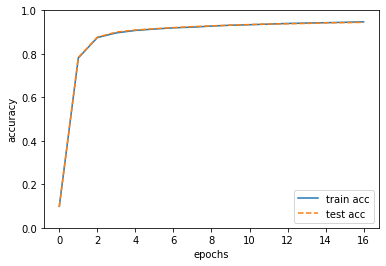

In [15]:
#미니배치 학습
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet 이미 코드 내에 존재

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
    
#반복이라 오래걸림

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()